# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
# Bug: numpy.ndarray' object has no attribute 'mask'
!pip install --upgrade pip
!pip install -U matplotlib

    100% |████████████████████████████████| 1.3MB 388kB/s eta 0:00:01
  Found existing installation: pip 9.0.1
    Uninstalling pip-9.0.1:
      Successfully uninstalled pip-9.0.1
    100% |████████████████████████████████| 12.9MB 3.2MB/s eta 0:00:01
    100% |████████████████████████████████| 952kB 19.4MB/s ta 0:00:01
  Found existing installation: matplotlib 2.1.0
    Uninstalling matplotlib-2.1.0:
      Successfully uninstalled matplotlib-2.1.0


In [2]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Extracting mnist: 100%|██████████| 60.0K/60.0K [00:13<00:00, 4.30KFile/s]


Extracting celeba...


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

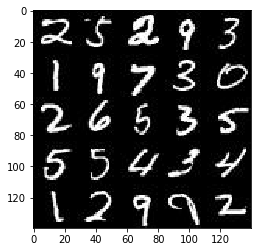

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

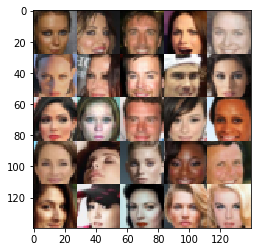

In [4]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [5]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.3.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [6]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    input_real = tf.placeholder(tf.float32, shape=(None, image_height, image_width, image_channels))
    input_z = tf.placeholder(tf.float32, shape=(None, z_dim))
    learning_rate = tf.placeholder(tf.float32)

    return input_real, input_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Operation'>):
<tf.Operation 'assert_rank_2/Assert/Assert' type=Assert>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
['File "/opt/conda/lib/python3.6/runpy.py", line 193, in _run_module_as_main\n    "__main__", mod_spec)', 'File "/opt/conda/lib/python3.6/runpy.py", line 85, in _run_code\n    exec(code, run_globals)', 'File "/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>\n    app.launch_new_instance()', 'File "/opt/conda/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance\n    app.start()', 'File "/opt/conda/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 497, in start\n    self.io_loop.start()', 'File "/opt/conda/lib/python3.6/site-packages/tornado/ioloop.py", line 832, in start\n    self._run_callback(self._callbacks.popleft())', 'File

### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the generator, tensor logits of the generator).

In [7]:
def discriminator(images, reuse=False, alpha=0.2):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    with tf.variable_scope("discriminator", reuse=reuse):
        # Input layer is 28 x 28
        
        # 14 x 14 x 64
        x1 = tf.layers.conv2d(images, 64, 5, strides=2, padding="same")
        x1 = tf.maximum(alpha * x1, x1)

        # 7 x 7 x 128
        x2 = tf.layers.conv2d(x1, 128, 5, strides=2, padding="same")
        x2 = tf.layers.batch_normalization(x2, training=True)
        x2 = tf.maximum(alpha * x2, x2)
        
        # 4 x 4 x 256
        x3 = tf.layers.conv2d(x2, 256, 5, strides=2, padding="same")
        x3 = tf.layers.batch_normalization(x3, training=True)
        x3 = tf.maximum(alpha * x3, x3)
        
        # fn
        flat = tf.reshape(x3, shape=(-1, 4 * 4 * 256))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
        
    return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [8]:
def generator(z, out_channel_dim, is_train=True, alpha=0.2):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    with tf.variable_scope('generator', reuse=(not is_train)):
        # First fully connected layer       
        x = tf.layers.dense(z, 7 * 7 * 256)
        
        # 7 x 7 x 256
        x1 = tf.reshape(x, (-1, 7, 7, 256))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(alpha * x1, x1)
        
        # 14 x 14 x 128
        x2 = tf.layers.conv2d_transpose(x1, 128, 5, strides=2, padding='same')
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(alpha * x2, x2)
        
        # 28 x 28 x 64
        x3 = tf.layers.conv2d_transpose(x2, 64, 5, strides=2, padding='same')
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.maximum(alpha * x3, x3)
        
        # 28 x 28 x 3
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 3, strides=1, padding='same')
        out = tf.tanh(logits)
    
    return out

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [9]:
def model_loss(input_real, input_z, output_dim, alpha=0.2):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    g_model = generator(input_z, output_dim, alpha=alpha)
    d_model_real, d_logits_real = discriminator(input_real, alpha=alpha)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True, alpha=alpha)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake

    return d_loss, g_loss

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [10]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    variables = tf.trainable_variables()
    d_vars = [var for var in variables if var.name.startswith('discriminator')]
    g_vars = [var for var in variables if var.name.startswith('generator')]
    
    update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
    d_updates = [opt for opt in update_ops if opt.name.startswith('discriminator')]
    g_updates = [opt for opt in update_ops if opt.name.startswith('generator')]

    with tf.control_dependencies(d_updates):
        d_opt = tf.train.AdamOptimizer(learning_rate=learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)

    with tf.control_dependencies(g_updates):
        g_opt = tf.train.AdamOptimizer(learning_rate=learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)
            
    return d_opt, g_opt

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [11]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, is_train=False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [12]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode,
          print_every=10, show_every=100):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    input_real, input_z, lr = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, data_shape[3], alpha=0.2)
    d_opt, g_opt = model_opt(d_loss, g_loss, lr, beta1)
    
    steps = 0
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                
                steps += 1
                # Change the range from (-0.5, 0.5) to (-1, 1) to be consistent with batch_z
                batch_images *= 2.0
                
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                
                _ = sess.run(d_opt, feed_dict={input_real: batch_images, 
                                               input_z: batch_z,
                                               lr: learning_rate})
                
                _ = sess.run(g_opt, feed_dict={input_real: batch_images,
                                               input_z: batch_z,
                                               lr: learning_rate})

                if steps % print_every == 0:
                    train_loss_d = d_loss.eval({input_real: batch_images,
                                                input_z: batch_z})
                    train_loss_g = g_loss.eval({input_real: batch_images,
                                                input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i + 1, epochs),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))

                if steps % show_every == 0:
                    show_generator_output(sess, 25, input_z, data_shape[3], data_image_mode)


### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 0.4014... Generator Loss: 1.5409
Epoch 1/2... Discriminator Loss: 0.3916... Generator Loss: 1.5278
Epoch 1/2... Discriminator Loss: 0.0966... Generator Loss: 3.0430
Epoch 1/2... Discriminator Loss: 0.0348... Generator Loss: 4.0774
Epoch 1/2... Discriminator Loss: 0.0216... Generator Loss: 4.5029
Epoch 1/2... Discriminator Loss: 0.0161... Generator Loss: 4.6695
Epoch 1/2... Discriminator Loss: 0.4719... Generator Loss: 1.2232
Epoch 1/2... Discriminator Loss: 2.8701... Generator Loss: 0.1022
Epoch 1/2... Discriminator Loss: 1.2780... Generator Loss: 1.8012
Epoch 1/2... Discriminator Loss: 1.0162... Generator Loss: 0.7880


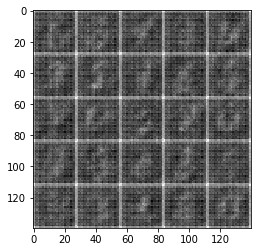

Epoch 1/2... Discriminator Loss: 1.1906... Generator Loss: 2.7244
Epoch 1/2... Discriminator Loss: 0.9336... Generator Loss: 1.3933
Epoch 1/2... Discriminator Loss: 1.0498... Generator Loss: 0.8843
Epoch 1/2... Discriminator Loss: 0.8215... Generator Loss: 1.2962
Epoch 1/2... Discriminator Loss: 1.1578... Generator Loss: 0.5910
Epoch 1/2... Discriminator Loss: 1.1736... Generator Loss: 0.5132
Epoch 1/2... Discriminator Loss: 0.9435... Generator Loss: 1.0558
Epoch 1/2... Discriminator Loss: 1.1380... Generator Loss: 1.3787
Epoch 1/2... Discriminator Loss: 1.0870... Generator Loss: 0.6224
Epoch 1/2... Discriminator Loss: 0.8607... Generator Loss: 0.9090


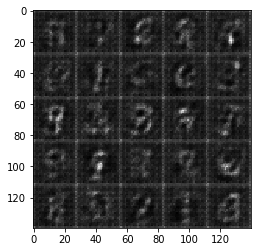

Epoch 1/2... Discriminator Loss: 0.9049... Generator Loss: 0.8486
Epoch 1/2... Discriminator Loss: 0.8163... Generator Loss: 1.5338
Epoch 1/2... Discriminator Loss: 0.7727... Generator Loss: 1.5681
Epoch 1/2... Discriminator Loss: 0.7745... Generator Loss: 1.6294
Epoch 1/2... Discriminator Loss: 0.8199... Generator Loss: 1.4515
Epoch 1/2... Discriminator Loss: 0.8190... Generator Loss: 1.7987
Epoch 1/2... Discriminator Loss: 0.7180... Generator Loss: 1.2891
Epoch 1/2... Discriminator Loss: 0.7260... Generator Loss: 1.7555
Epoch 1/2... Discriminator Loss: 0.9109... Generator Loss: 0.7086
Epoch 1/2... Discriminator Loss: 0.6951... Generator Loss: 1.2261


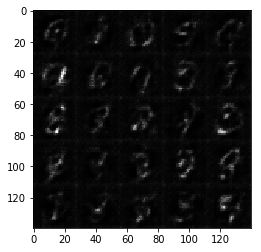

Epoch 1/2... Discriminator Loss: 0.7386... Generator Loss: 1.5398
Epoch 1/2... Discriminator Loss: 0.5912... Generator Loss: 1.2756
Epoch 1/2... Discriminator Loss: 0.6604... Generator Loss: 1.2555
Epoch 1/2... Discriminator Loss: 0.8495... Generator Loss: 0.7427
Epoch 1/2... Discriminator Loss: 0.5776... Generator Loss: 1.3488
Epoch 1/2... Discriminator Loss: 0.6260... Generator Loss: 1.0309
Epoch 1/2... Discriminator Loss: 0.5542... Generator Loss: 1.2951
Epoch 1/2... Discriminator Loss: 0.7786... Generator Loss: 2.5676
Epoch 1/2... Discriminator Loss: 0.8173... Generator Loss: 0.7600
Epoch 1/2... Discriminator Loss: 0.4105... Generator Loss: 1.7309


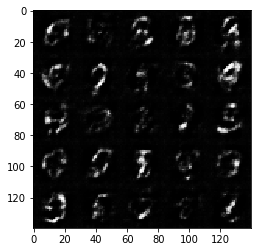

Epoch 1/2... Discriminator Loss: 0.4350... Generator Loss: 1.5306
Epoch 1/2... Discriminator Loss: 0.4727... Generator Loss: 1.7941
Epoch 1/2... Discriminator Loss: 0.5031... Generator Loss: 1.3535
Epoch 1/2... Discriminator Loss: 0.8240... Generator Loss: 0.7934
Epoch 1/2... Discriminator Loss: 0.3839... Generator Loss: 1.6937
Epoch 1/2... Discriminator Loss: 0.3553... Generator Loss: 1.8135
Epoch 1/2... Discriminator Loss: 0.4655... Generator Loss: 1.3587
Epoch 1/2... Discriminator Loss: 0.4436... Generator Loss: 1.4038
Epoch 1/2... Discriminator Loss: 0.3801... Generator Loss: 1.9303
Epoch 1/2... Discriminator Loss: 0.4322... Generator Loss: 1.5747


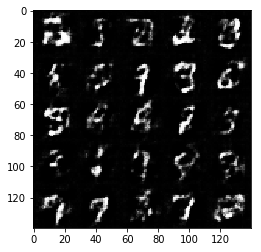

Epoch 1/2... Discriminator Loss: 0.8089... Generator Loss: 0.6996
Epoch 1/2... Discriminator Loss: 0.4958... Generator Loss: 2.6604
Epoch 1/2... Discriminator Loss: 0.3774... Generator Loss: 1.8491
Epoch 1/2... Discriminator Loss: 0.5361... Generator Loss: 1.1687
Epoch 1/2... Discriminator Loss: 0.7252... Generator Loss: 0.9434
Epoch 1/2... Discriminator Loss: 0.9965... Generator Loss: 0.6628
Epoch 1/2... Discriminator Loss: 0.3460... Generator Loss: 2.2702
Epoch 1/2... Discriminator Loss: 1.1043... Generator Loss: 3.4607
Epoch 1/2... Discriminator Loss: 0.4628... Generator Loss: 1.7721
Epoch 1/2... Discriminator Loss: 0.4654... Generator Loss: 1.4809


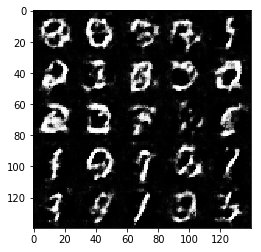

Epoch 1/2... Discriminator Loss: 0.6752... Generator Loss: 1.9284
Epoch 1/2... Discriminator Loss: 0.8676... Generator Loss: 0.7630
Epoch 1/2... Discriminator Loss: 0.7556... Generator Loss: 2.7562
Epoch 1/2... Discriminator Loss: 0.7030... Generator Loss: 1.3723
Epoch 1/2... Discriminator Loss: 0.8842... Generator Loss: 2.3587
Epoch 1/2... Discriminator Loss: 0.9349... Generator Loss: 0.6528
Epoch 1/2... Discriminator Loss: 0.7548... Generator Loss: 1.0472
Epoch 1/2... Discriminator Loss: 0.7115... Generator Loss: 1.0012
Epoch 1/2... Discriminator Loss: 0.8943... Generator Loss: 1.7065
Epoch 1/2... Discriminator Loss: 0.9350... Generator Loss: 0.7336


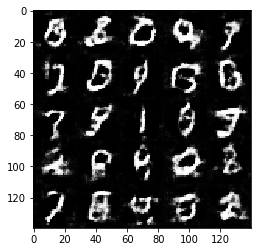

Epoch 1/2... Discriminator Loss: 0.5185... Generator Loss: 1.6703
Epoch 1/2... Discriminator Loss: 0.9331... Generator Loss: 0.6572
Epoch 1/2... Discriminator Loss: 0.6138... Generator Loss: 1.6608
Epoch 1/2... Discriminator Loss: 1.3360... Generator Loss: 0.4178
Epoch 1/2... Discriminator Loss: 0.6312... Generator Loss: 1.3411
Epoch 1/2... Discriminator Loss: 0.8339... Generator Loss: 0.7900
Epoch 1/2... Discriminator Loss: 0.8609... Generator Loss: 1.5657
Epoch 1/2... Discriminator Loss: 0.6804... Generator Loss: 1.1193
Epoch 1/2... Discriminator Loss: 1.2063... Generator Loss: 0.4645
Epoch 1/2... Discriminator Loss: 0.6592... Generator Loss: 1.0871


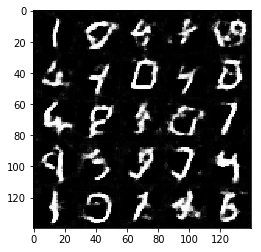

Epoch 1/2... Discriminator Loss: 0.8262... Generator Loss: 0.8048
Epoch 1/2... Discriminator Loss: 0.6993... Generator Loss: 1.7652
Epoch 1/2... Discriminator Loss: 0.6499... Generator Loss: 1.0927
Epoch 1/2... Discriminator Loss: 0.4939... Generator Loss: 1.7592
Epoch 1/2... Discriminator Loss: 0.7673... Generator Loss: 0.8773
Epoch 1/2... Discriminator Loss: 0.5195... Generator Loss: 1.4237
Epoch 1/2... Discriminator Loss: 0.6160... Generator Loss: 1.3257
Epoch 1/2... Discriminator Loss: 0.6648... Generator Loss: 1.3873
Epoch 1/2... Discriminator Loss: 0.6813... Generator Loss: 2.1482
Epoch 1/2... Discriminator Loss: 0.7861... Generator Loss: 1.0034


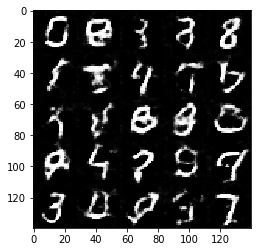

Epoch 1/2... Discriminator Loss: 0.5552... Generator Loss: 1.4003
Epoch 1/2... Discriminator Loss: 1.0982... Generator Loss: 0.5634
Epoch 1/2... Discriminator Loss: 0.5950... Generator Loss: 1.2396
Epoch 2/2... Discriminator Loss: 0.7649... Generator Loss: 2.0448
Epoch 2/2... Discriminator Loss: 0.6338... Generator Loss: 1.3542
Epoch 2/2... Discriminator Loss: 0.5932... Generator Loss: 1.2881
Epoch 2/2... Discriminator Loss: 0.7235... Generator Loss: 2.2167
Epoch 2/2... Discriminator Loss: 0.5926... Generator Loss: 1.8239
Epoch 2/2... Discriminator Loss: 0.7544... Generator Loss: 0.9209
Epoch 2/2... Discriminator Loss: 0.6605... Generator Loss: 1.3254


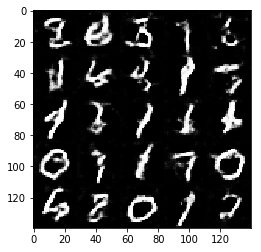

Epoch 2/2... Discriminator Loss: 0.8643... Generator Loss: 2.4963
Epoch 2/2... Discriminator Loss: 0.6525... Generator Loss: 1.5846
Epoch 2/2... Discriminator Loss: 0.6259... Generator Loss: 1.4037
Epoch 2/2... Discriminator Loss: 0.6017... Generator Loss: 1.4827
Epoch 2/2... Discriminator Loss: 0.6180... Generator Loss: 1.1479
Epoch 2/2... Discriminator Loss: 0.7611... Generator Loss: 0.8492
Epoch 2/2... Discriminator Loss: 0.6885... Generator Loss: 1.7711
Epoch 2/2... Discriminator Loss: 0.7545... Generator Loss: 1.8593
Epoch 2/2... Discriminator Loss: 0.6120... Generator Loss: 1.7002
Epoch 2/2... Discriminator Loss: 0.9451... Generator Loss: 2.1786


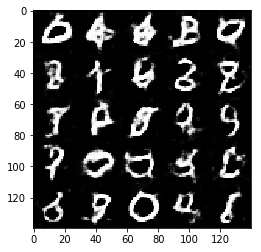

Epoch 2/2... Discriminator Loss: 0.7254... Generator Loss: 1.6860
Epoch 2/2... Discriminator Loss: 0.7498... Generator Loss: 1.9055
Epoch 2/2... Discriminator Loss: 0.9647... Generator Loss: 0.7063
Epoch 2/2... Discriminator Loss: 0.7235... Generator Loss: 1.0292
Epoch 2/2... Discriminator Loss: 0.7757... Generator Loss: 1.6389
Epoch 2/2... Discriminator Loss: 0.6748... Generator Loss: 1.4624
Epoch 2/2... Discriminator Loss: 0.7268... Generator Loss: 1.1788
Epoch 2/2... Discriminator Loss: 0.6717... Generator Loss: 1.3221
Epoch 2/2... Discriminator Loss: 0.8766... Generator Loss: 0.7359
Epoch 2/2... Discriminator Loss: 0.7128... Generator Loss: 1.0062


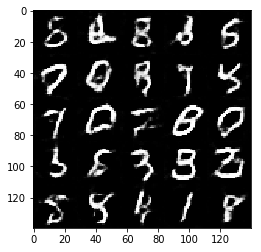

Epoch 2/2... Discriminator Loss: 0.4703... Generator Loss: 2.1370
Epoch 2/2... Discriminator Loss: 1.0229... Generator Loss: 0.6103
Epoch 2/2... Discriminator Loss: 0.6115... Generator Loss: 1.2530
Epoch 2/2... Discriminator Loss: 0.5716... Generator Loss: 1.3863
Epoch 2/2... Discriminator Loss: 0.5951... Generator Loss: 1.5142
Epoch 2/2... Discriminator Loss: 0.9997... Generator Loss: 0.6215
Epoch 2/2... Discriminator Loss: 0.6426... Generator Loss: 1.4191
Epoch 2/2... Discriminator Loss: 0.6017... Generator Loss: 1.3475
Epoch 2/2... Discriminator Loss: 0.6619... Generator Loss: 1.1855
Epoch 2/2... Discriminator Loss: 0.5137... Generator Loss: 1.5480


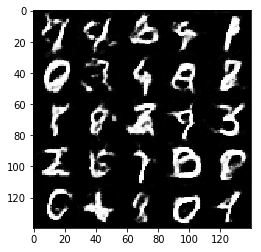

Epoch 2/2... Discriminator Loss: 0.7467... Generator Loss: 1.2972
Epoch 2/2... Discriminator Loss: 0.6840... Generator Loss: 1.6383
Epoch 2/2... Discriminator Loss: 0.5878... Generator Loss: 1.3697
Epoch 2/2... Discriminator Loss: 0.7223... Generator Loss: 1.2677
Epoch 2/2... Discriminator Loss: 0.6100... Generator Loss: 1.1953
Epoch 2/2... Discriminator Loss: 0.5422... Generator Loss: 1.3839
Epoch 2/2... Discriminator Loss: 0.7468... Generator Loss: 1.0202
Epoch 2/2... Discriminator Loss: 0.5142... Generator Loss: 1.4504
Epoch 2/2... Discriminator Loss: 0.7915... Generator Loss: 0.8784
Epoch 2/2... Discriminator Loss: 0.7216... Generator Loss: 0.9111


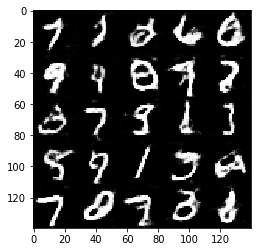

Epoch 2/2... Discriminator Loss: 0.6214... Generator Loss: 1.4719
Epoch 2/2... Discriminator Loss: 0.6876... Generator Loss: 1.1195
Epoch 2/2... Discriminator Loss: 0.5637... Generator Loss: 1.1788
Epoch 2/2... Discriminator Loss: 0.5430... Generator Loss: 1.8968
Epoch 2/2... Discriminator Loss: 0.5446... Generator Loss: 1.2059
Epoch 2/2... Discriminator Loss: 0.5556... Generator Loss: 1.5589
Epoch 2/2... Discriminator Loss: 0.5698... Generator Loss: 1.3320
Epoch 2/2... Discriminator Loss: 0.5830... Generator Loss: 1.2086
Epoch 2/2... Discriminator Loss: 0.6244... Generator Loss: 1.9815
Epoch 2/2... Discriminator Loss: 0.6529... Generator Loss: 1.1252


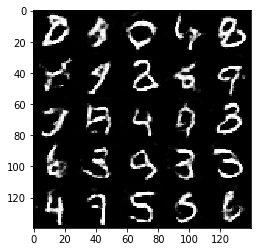

Epoch 2/2... Discriminator Loss: 0.6063... Generator Loss: 1.1845
Epoch 2/2... Discriminator Loss: 0.5929... Generator Loss: 1.1628
Epoch 2/2... Discriminator Loss: 0.5559... Generator Loss: 2.2175
Epoch 2/2... Discriminator Loss: 1.4019... Generator Loss: 0.3674
Epoch 2/2... Discriminator Loss: 0.5798... Generator Loss: 1.5165
Epoch 2/2... Discriminator Loss: 0.5503... Generator Loss: 1.2815
Epoch 2/2... Discriminator Loss: 0.5228... Generator Loss: 1.8273
Epoch 2/2... Discriminator Loss: 0.7096... Generator Loss: 0.9934
Epoch 2/2... Discriminator Loss: 0.4354... Generator Loss: 1.6838
Epoch 2/2... Discriminator Loss: 0.7196... Generator Loss: 0.9802


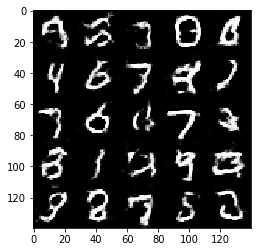

Epoch 2/2... Discriminator Loss: 0.8577... Generator Loss: 0.7570
Epoch 2/2... Discriminator Loss: 0.6809... Generator Loss: 0.9812
Epoch 2/2... Discriminator Loss: 1.1041... Generator Loss: 0.7298
Epoch 2/2... Discriminator Loss: 0.9450... Generator Loss: 0.7155
Epoch 2/2... Discriminator Loss: 0.8680... Generator Loss: 0.8787
Epoch 2/2... Discriminator Loss: 0.7308... Generator Loss: 1.0059
Epoch 2/2... Discriminator Loss: 0.5994... Generator Loss: 1.1517
Epoch 2/2... Discriminator Loss: 0.5134... Generator Loss: 1.3305
Epoch 2/2... Discriminator Loss: 0.4619... Generator Loss: 1.4384
Epoch 2/2... Discriminator Loss: 0.5103... Generator Loss: 1.4280


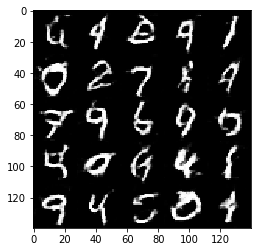

Epoch 2/2... Discriminator Loss: 0.5958... Generator Loss: 1.2371
Epoch 2/2... Discriminator Loss: 0.5933... Generator Loss: 1.2995
Epoch 2/2... Discriminator Loss: 1.0173... Generator Loss: 0.6489
Epoch 2/2... Discriminator Loss: 0.5458... Generator Loss: 1.3931
Epoch 2/2... Discriminator Loss: 0.5639... Generator Loss: 1.0966
Epoch 2/2... Discriminator Loss: 0.5867... Generator Loss: 1.3294
Epoch 2/2... Discriminator Loss: 0.6836... Generator Loss: 0.9750
Epoch 2/2... Discriminator Loss: 0.5558... Generator Loss: 1.3029
Epoch 2/2... Discriminator Loss: 0.5999... Generator Loss: 1.1659
Epoch 2/2... Discriminator Loss: 0.7560... Generator Loss: 0.8615


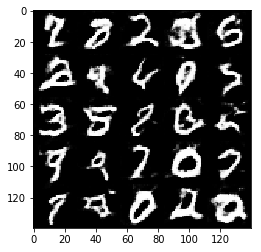

Epoch 2/2... Discriminator Loss: 0.6266... Generator Loss: 2.1106
Epoch 2/2... Discriminator Loss: 0.4537... Generator Loss: 1.5135
Epoch 2/2... Discriminator Loss: 0.5413... Generator Loss: 2.0428
Epoch 2/2... Discriminator Loss: 0.6483... Generator Loss: 2.5097
Epoch 2/2... Discriminator Loss: 5.1117... Generator Loss: 7.2609
Epoch 2/2... Discriminator Loss: 0.5151... Generator Loss: 1.3290
Epoch 2/2... Discriminator Loss: 0.5254... Generator Loss: 1.3900


In [13]:
batch_size = 64
z_dim = 100
learning_rate = 0.0001
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 0.3725... Generator Loss: 1.4854
Epoch 1/1... Discriminator Loss: 0.1122... Generator Loss: 2.7141
Epoch 1/1... Discriminator Loss: 0.0693... Generator Loss: 3.3818
Epoch 1/1... Discriminator Loss: 0.3875... Generator Loss: 1.3745
Epoch 1/1... Discriminator Loss: 0.0266... Generator Loss: 4.3926
Epoch 1/1... Discriminator Loss: 0.0160... Generator Loss: 4.7464
Epoch 1/1... Discriminator Loss: 0.0298... Generator Loss: 4.4764
Epoch 1/1... Discriminator Loss: 0.7684... Generator Loss: 0.8356
Epoch 1/1... Discriminator Loss: 1.0283... Generator Loss: 1.5069
Epoch 1/1... Discriminator Loss: 0.0028... Generator Loss: 13.7294


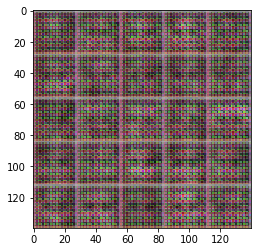

Epoch 1/1... Discriminator Loss: 0.1899... Generator Loss: 3.0365
Epoch 1/1... Discriminator Loss: 0.5037... Generator Loss: 9.2992
Epoch 1/1... Discriminator Loss: 0.4937... Generator Loss: 4.9446
Epoch 1/1... Discriminator Loss: 0.6352... Generator Loss: 1.6365
Epoch 1/1... Discriminator Loss: 0.4176... Generator Loss: 2.2479
Epoch 1/1... Discriminator Loss: 0.7752... Generator Loss: 2.7686
Epoch 1/1... Discriminator Loss: 0.9329... Generator Loss: 0.7428
Epoch 1/1... Discriminator Loss: 0.5700... Generator Loss: 2.2398
Epoch 1/1... Discriminator Loss: 1.0757... Generator Loss: 0.6503
Epoch 1/1... Discriminator Loss: 1.2438... Generator Loss: 0.5200


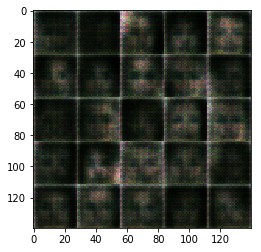

Epoch 1/1... Discriminator Loss: 0.5460... Generator Loss: 1.7177
Epoch 1/1... Discriminator Loss: 1.6112... Generator Loss: 0.3430
Epoch 1/1... Discriminator Loss: 1.4214... Generator Loss: 0.8737
Epoch 1/1... Discriminator Loss: 0.9009... Generator Loss: 1.1290
Epoch 1/1... Discriminator Loss: 0.6768... Generator Loss: 2.1651
Epoch 1/1... Discriminator Loss: 1.4164... Generator Loss: 0.4046
Epoch 1/1... Discriminator Loss: 0.9075... Generator Loss: 0.7545
Epoch 1/1... Discriminator Loss: 0.7575... Generator Loss: 1.2736
Epoch 1/1... Discriminator Loss: 0.8062... Generator Loss: 2.6649
Epoch 1/1... Discriminator Loss: 0.9220... Generator Loss: 0.9507


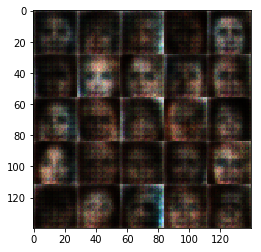

Epoch 1/1... Discriminator Loss: 0.2847... Generator Loss: 2.9359
Epoch 1/1... Discriminator Loss: 1.0041... Generator Loss: 1.1755
Epoch 1/1... Discriminator Loss: 0.9431... Generator Loss: 0.7620
Epoch 1/1... Discriminator Loss: 1.7761... Generator Loss: 0.2710
Epoch 1/1... Discriminator Loss: 1.0076... Generator Loss: 0.9955
Epoch 1/1... Discriminator Loss: 0.9545... Generator Loss: 0.7287
Epoch 1/1... Discriminator Loss: 0.5102... Generator Loss: 1.3452
Epoch 1/1... Discriminator Loss: 0.3098... Generator Loss: 2.0342
Epoch 1/1... Discriminator Loss: 0.1899... Generator Loss: 2.9557
Epoch 1/1... Discriminator Loss: 0.6376... Generator Loss: 1.2810


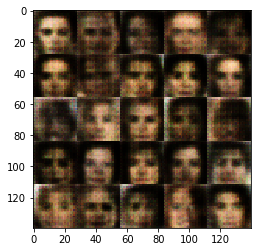

Epoch 1/1... Discriminator Loss: 0.7445... Generator Loss: 1.1682
Epoch 1/1... Discriminator Loss: 1.6818... Generator Loss: 0.3356
Epoch 1/1... Discriminator Loss: 1.1036... Generator Loss: 1.7644
Epoch 1/1... Discriminator Loss: 0.5395... Generator Loss: 1.7506
Epoch 1/1... Discriminator Loss: 2.6064... Generator Loss: 5.1775
Epoch 1/1... Discriminator Loss: 3.0803... Generator Loss: 0.0683
Epoch 1/1... Discriminator Loss: 1.3359... Generator Loss: 0.4764
Epoch 1/1... Discriminator Loss: 1.2291... Generator Loss: 0.5273
Epoch 1/1... Discriminator Loss: 0.6044... Generator Loss: 1.3630
Epoch 1/1... Discriminator Loss: 1.2346... Generator Loss: 2.7758


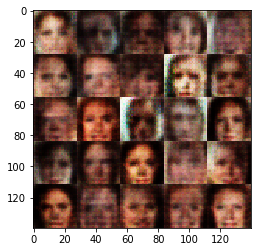

Epoch 1/1... Discriminator Loss: 1.2220... Generator Loss: 0.5848
Epoch 1/1... Discriminator Loss: 2.2038... Generator Loss: 0.1722
Epoch 1/1... Discriminator Loss: 0.6400... Generator Loss: 1.1380
Epoch 1/1... Discriminator Loss: 1.0576... Generator Loss: 3.0335
Epoch 1/1... Discriminator Loss: 0.7598... Generator Loss: 1.3459
Epoch 1/1... Discriminator Loss: 1.2775... Generator Loss: 0.5467
Epoch 1/1... Discriminator Loss: 0.9839... Generator Loss: 0.7049
Epoch 1/1... Discriminator Loss: 0.3688... Generator Loss: 2.5322
Epoch 1/1... Discriminator Loss: 0.6351... Generator Loss: 2.4922
Epoch 1/1... Discriminator Loss: 1.7501... Generator Loss: 0.3007


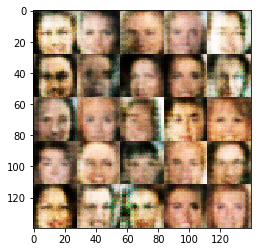

Epoch 1/1... Discriminator Loss: 0.4359... Generator Loss: 2.4035
Epoch 1/1... Discriminator Loss: 0.6397... Generator Loss: 1.8755
Epoch 1/1... Discriminator Loss: 2.8316... Generator Loss: 0.0913
Epoch 1/1... Discriminator Loss: 0.9435... Generator Loss: 2.0926
Epoch 1/1... Discriminator Loss: 0.4582... Generator Loss: 2.4849
Epoch 1/1... Discriminator Loss: 1.2944... Generator Loss: 0.4504
Epoch 1/1... Discriminator Loss: 0.6437... Generator Loss: 2.2109
Epoch 1/1... Discriminator Loss: 0.5524... Generator Loss: 2.8704
Epoch 1/1... Discriminator Loss: 0.2097... Generator Loss: 4.3094
Epoch 1/1... Discriminator Loss: 0.3530... Generator Loss: 2.1188


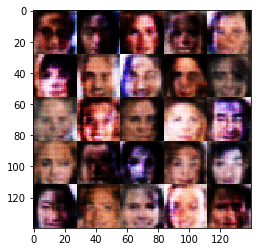

Epoch 1/1... Discriminator Loss: 0.6241... Generator Loss: 1.4754
Epoch 1/1... Discriminator Loss: 0.6908... Generator Loss: 0.9661
Epoch 1/1... Discriminator Loss: 1.0878... Generator Loss: 5.4875
Epoch 1/1... Discriminator Loss: 1.4164... Generator Loss: 0.4090
Epoch 1/1... Discriminator Loss: 0.6336... Generator Loss: 1.1649
Epoch 1/1... Discriminator Loss: 0.3510... Generator Loss: 6.4861
Epoch 1/1... Discriminator Loss: 0.3673... Generator Loss: 1.5860
Epoch 1/1... Discriminator Loss: 0.1798... Generator Loss: 2.8827
Epoch 1/1... Discriminator Loss: 0.3669... Generator Loss: 1.5890
Epoch 1/1... Discriminator Loss: 0.7713... Generator Loss: 1.1036


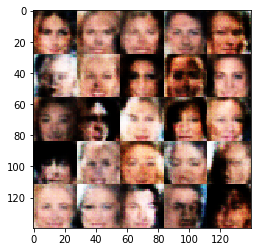

Epoch 1/1... Discriminator Loss: 0.7082... Generator Loss: 1.0095
Epoch 1/1... Discriminator Loss: 0.9452... Generator Loss: 0.6597
Epoch 1/1... Discriminator Loss: 0.1581... Generator Loss: 2.9372
Epoch 1/1... Discriminator Loss: 0.2104... Generator Loss: 4.3302
Epoch 1/1... Discriminator Loss: 0.1777... Generator Loss: 2.3439
Epoch 1/1... Discriminator Loss: 0.2279... Generator Loss: 2.7348
Epoch 1/1... Discriminator Loss: 0.1379... Generator Loss: 3.2338
Epoch 1/1... Discriminator Loss: 0.2830... Generator Loss: 2.0011
Epoch 1/1... Discriminator Loss: 0.8766... Generator Loss: 0.8758
Epoch 1/1... Discriminator Loss: 2.6106... Generator Loss: 0.0993


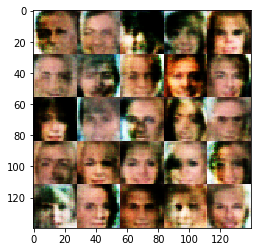

Epoch 1/1... Discriminator Loss: 0.7441... Generator Loss: 1.4445
Epoch 1/1... Discriminator Loss: 0.1543... Generator Loss: 5.3584
Epoch 1/1... Discriminator Loss: 0.1154... Generator Loss: 2.9419
Epoch 1/1... Discriminator Loss: 0.1074... Generator Loss: 4.6101
Epoch 1/1... Discriminator Loss: 0.4694... Generator Loss: 1.4308
Epoch 1/1... Discriminator Loss: 0.1755... Generator Loss: 2.6544
Epoch 1/1... Discriminator Loss: 0.1981... Generator Loss: 3.1361
Epoch 1/1... Discriminator Loss: 0.6386... Generator Loss: 1.8209
Epoch 1/1... Discriminator Loss: 0.9708... Generator Loss: 0.6108
Epoch 1/1... Discriminator Loss: 0.2257... Generator Loss: 3.5240


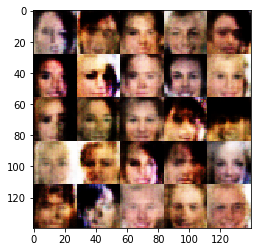

Epoch 1/1... Discriminator Loss: 0.1494... Generator Loss: 4.6416
Epoch 1/1... Discriminator Loss: 0.5692... Generator Loss: 1.2324
Epoch 1/1... Discriminator Loss: 0.1551... Generator Loss: 3.9734
Epoch 1/1... Discriminator Loss: 0.1586... Generator Loss: 3.5348
Epoch 1/1... Discriminator Loss: 0.2337... Generator Loss: 6.3259
Epoch 1/1... Discriminator Loss: 0.1220... Generator Loss: 3.6773
Epoch 1/1... Discriminator Loss: 0.1819... Generator Loss: 2.6352
Epoch 1/1... Discriminator Loss: 1.9126... Generator Loss: 0.2202
Epoch 1/1... Discriminator Loss: 0.1325... Generator Loss: 3.4929
Epoch 1/1... Discriminator Loss: 0.1757... Generator Loss: 2.9663


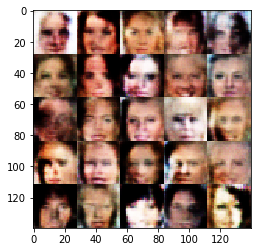

Epoch 1/1... Discriminator Loss: 0.0838... Generator Loss: 4.6923
Epoch 1/1... Discriminator Loss: 0.2928... Generator Loss: 5.4088
Epoch 1/1... Discriminator Loss: 0.1643... Generator Loss: 5.5382
Epoch 1/1... Discriminator Loss: 0.5289... Generator Loss: 1.3441
Epoch 1/1... Discriminator Loss: 0.9661... Generator Loss: 0.6857
Epoch 1/1... Discriminator Loss: 0.1393... Generator Loss: 6.5895
Epoch 1/1... Discriminator Loss: 0.0737... Generator Loss: 6.8736
Epoch 1/1... Discriminator Loss: 0.4562... Generator Loss: 6.2974
Epoch 1/1... Discriminator Loss: 0.0731... Generator Loss: 4.1744
Epoch 1/1... Discriminator Loss: 0.2403... Generator Loss: 2.0333


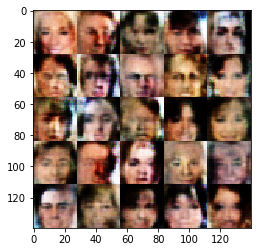

Epoch 1/1... Discriminator Loss: 0.0617... Generator Loss: 4.5555
Epoch 1/1... Discriminator Loss: 0.1034... Generator Loss: 6.5898
Epoch 1/1... Discriminator Loss: 0.4877... Generator Loss: 1.2112
Epoch 1/1... Discriminator Loss: 0.1912... Generator Loss: 2.6353
Epoch 1/1... Discriminator Loss: 0.6240... Generator Loss: 1.0552
Epoch 1/1... Discriminator Loss: 0.0920... Generator Loss: 6.4612
Epoch 1/1... Discriminator Loss: 0.2284... Generator Loss: 6.0677
Epoch 1/1... Discriminator Loss: 0.1031... Generator Loss: 4.7862
Epoch 1/1... Discriminator Loss: 0.4160... Generator Loss: 1.4811
Epoch 1/1... Discriminator Loss: 0.1486... Generator Loss: 2.6759


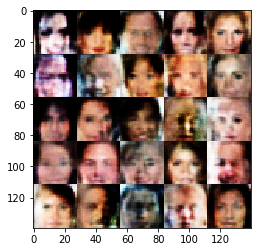

Epoch 1/1... Discriminator Loss: 0.5437... Generator Loss: 1.1184
Epoch 1/1... Discriminator Loss: 0.0512... Generator Loss: 4.1389
Epoch 1/1... Discriminator Loss: 0.0540... Generator Loss: 7.3193
Epoch 1/1... Discriminator Loss: 0.4569... Generator Loss: 1.4081
Epoch 1/1... Discriminator Loss: 0.1265... Generator Loss: 3.2481
Epoch 1/1... Discriminator Loss: 0.3087... Generator Loss: 1.7148
Epoch 1/1... Discriminator Loss: 0.0355... Generator Loss: 5.6774
Epoch 1/1... Discriminator Loss: 0.1792... Generator Loss: 8.6638
Epoch 1/1... Discriminator Loss: 0.4930... Generator Loss: 1.2728
Epoch 1/1... Discriminator Loss: 0.1391... Generator Loss: 5.0885


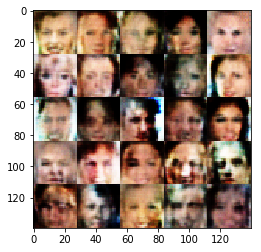

Epoch 1/1... Discriminator Loss: 0.0839... Generator Loss: 5.0567
Epoch 1/1... Discriminator Loss: 0.2842... Generator Loss: 5.9667
Epoch 1/1... Discriminator Loss: 0.0670... Generator Loss: 4.6957
Epoch 1/1... Discriminator Loss: 0.0364... Generator Loss: 6.9338
Epoch 1/1... Discriminator Loss: 0.2400... Generator Loss: 6.9626
Epoch 1/1... Discriminator Loss: 1.7033... Generator Loss: 0.2851
Epoch 1/1... Discriminator Loss: 0.5398... Generator Loss: 1.2311
Epoch 1/1... Discriminator Loss: 0.1681... Generator Loss: 4.3873
Epoch 1/1... Discriminator Loss: 0.1026... Generator Loss: 3.6065
Epoch 1/1... Discriminator Loss: 0.0878... Generator Loss: 3.5310


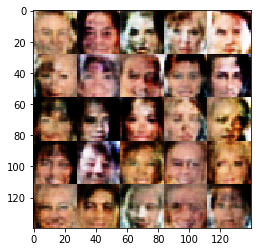

Epoch 1/1... Discriminator Loss: 0.0373... Generator Loss: 7.1469
Epoch 1/1... Discriminator Loss: 0.0552... Generator Loss: 5.1426
Epoch 1/1... Discriminator Loss: 0.1876... Generator Loss: 5.6280
Epoch 1/1... Discriminator Loss: 0.2765... Generator Loss: 1.8832
Epoch 1/1... Discriminator Loss: 0.0938... Generator Loss: 8.0249
Epoch 1/1... Discriminator Loss: 0.4677... Generator Loss: 1.4419
Epoch 1/1... Discriminator Loss: 0.0632... Generator Loss: 6.1417
Epoch 1/1... Discriminator Loss: 0.1375... Generator Loss: 6.7822
Epoch 1/1... Discriminator Loss: 0.0483... Generator Loss: 6.9385
Epoch 1/1... Discriminator Loss: 0.0378... Generator Loss: 4.8611


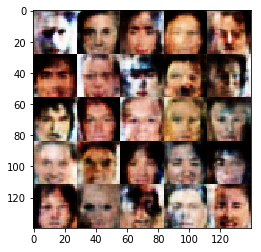

Epoch 1/1... Discriminator Loss: 0.0195... Generator Loss: 5.1094
Epoch 1/1... Discriminator Loss: 0.0556... Generator Loss: 4.9823
Epoch 1/1... Discriminator Loss: 0.0682... Generator Loss: 3.1246
Epoch 1/1... Discriminator Loss: 0.1478... Generator Loss: 2.5010
Epoch 1/1... Discriminator Loss: 1.7985... Generator Loss: 0.2927
Epoch 1/1... Discriminator Loss: 0.0420... Generator Loss: 6.0285
Epoch 1/1... Discriminator Loss: 0.0152... Generator Loss: 5.8943
Epoch 1/1... Discriminator Loss: 0.0704... Generator Loss: 4.1905
Epoch 1/1... Discriminator Loss: 0.0462... Generator Loss: 5.2499
Epoch 1/1... Discriminator Loss: 0.0474... Generator Loss: 5.5322


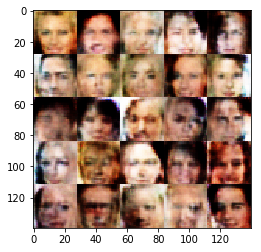

Epoch 1/1... Discriminator Loss: 0.0194... Generator Loss: 6.8452
Epoch 1/1... Discriminator Loss: 0.0797... Generator Loss: 7.0443
Epoch 1/1... Discriminator Loss: 0.2071... Generator Loss: 2.2439
Epoch 1/1... Discriminator Loss: 0.0964... Generator Loss: 5.0291
Epoch 1/1... Discriminator Loss: 0.0434... Generator Loss: 5.7399
Epoch 1/1... Discriminator Loss: 0.3528... Generator Loss: 1.8799
Epoch 1/1... Discriminator Loss: 0.0618... Generator Loss: 6.0081
Epoch 1/1... Discriminator Loss: 0.0418... Generator Loss: 5.9803
Epoch 1/1... Discriminator Loss: 0.1032... Generator Loss: 3.0603
Epoch 1/1... Discriminator Loss: 0.0956... Generator Loss: 3.5243


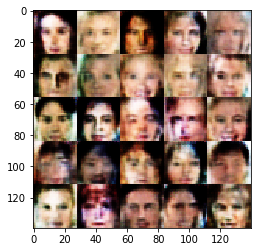

Epoch 1/1... Discriminator Loss: 0.0526... Generator Loss: 4.2260
Epoch 1/1... Discriminator Loss: 0.0600... Generator Loss: 4.7644
Epoch 1/1... Discriminator Loss: 0.0205... Generator Loss: 6.1154
Epoch 1/1... Discriminator Loss: 0.0487... Generator Loss: 4.0717
Epoch 1/1... Discriminator Loss: 0.0353... Generator Loss: 7.0524
Epoch 1/1... Discriminator Loss: 0.1089... Generator Loss: 2.8734
Epoch 1/1... Discriminator Loss: 0.0691... Generator Loss: 7.3766
Epoch 1/1... Discriminator Loss: 0.4867... Generator Loss: 1.1795
Epoch 1/1... Discriminator Loss: 0.3729... Generator Loss: 7.2972
Epoch 1/1... Discriminator Loss: 0.5126... Generator Loss: 1.8362


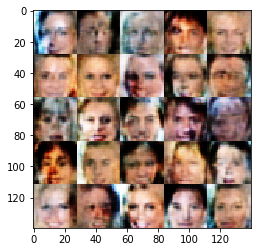

Epoch 1/1... Discriminator Loss: 1.9521... Generator Loss: 0.2958
Epoch 1/1... Discriminator Loss: 0.2424... Generator Loss: 4.2085
Epoch 1/1... Discriminator Loss: 0.5363... Generator Loss: 1.3500
Epoch 1/1... Discriminator Loss: 0.0967... Generator Loss: 3.4909
Epoch 1/1... Discriminator Loss: 0.0521... Generator Loss: 4.5949
Epoch 1/1... Discriminator Loss: 0.0946... Generator Loss: 5.1333
Epoch 1/1... Discriminator Loss: 0.0671... Generator Loss: 3.6581
Epoch 1/1... Discriminator Loss: 0.1609... Generator Loss: 2.3128
Epoch 1/1... Discriminator Loss: 0.2272... Generator Loss: 3.6098
Epoch 1/1... Discriminator Loss: 0.3310... Generator Loss: 1.6265


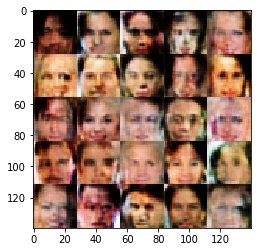

Epoch 1/1... Discriminator Loss: 0.0745... Generator Loss: 5.9435
Epoch 1/1... Discriminator Loss: 0.0336... Generator Loss: 10.2611
Epoch 1/1... Discriminator Loss: 0.1365... Generator Loss: 2.4493
Epoch 1/1... Discriminator Loss: 0.2584... Generator Loss: 7.8063
Epoch 1/1... Discriminator Loss: 0.2170... Generator Loss: 2.6202
Epoch 1/1... Discriminator Loss: 2.3896... Generator Loss: 0.1790
Epoch 1/1... Discriminator Loss: 0.3285... Generator Loss: 2.6009
Epoch 1/1... Discriminator Loss: 0.0594... Generator Loss: 4.4847
Epoch 1/1... Discriminator Loss: 0.0343... Generator Loss: 6.2786
Epoch 1/1... Discriminator Loss: 0.1442... Generator Loss: 2.7573


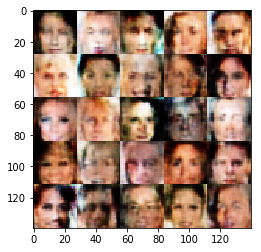

Epoch 1/1... Discriminator Loss: 0.0509... Generator Loss: 5.0055
Epoch 1/1... Discriminator Loss: 0.0381... Generator Loss: 4.8930
Epoch 1/1... Discriminator Loss: 0.0632... Generator Loss: 3.3964
Epoch 1/1... Discriminator Loss: 0.1023... Generator Loss: 2.8480
Epoch 1/1... Discriminator Loss: 0.2279... Generator Loss: 2.1402
Epoch 1/1... Discriminator Loss: 0.1194... Generator Loss: 3.6567
Epoch 1/1... Discriminator Loss: 0.1171... Generator Loss: 6.5878
Epoch 1/1... Discriminator Loss: 0.0436... Generator Loss: 7.8242
Epoch 1/1... Discriminator Loss: 0.0296... Generator Loss: 7.0325
Epoch 1/1... Discriminator Loss: 0.0812... Generator Loss: 3.2646


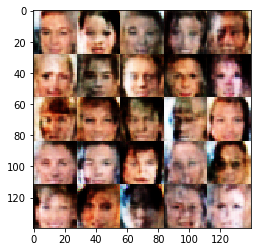

Epoch 1/1... Discriminator Loss: 0.0129... Generator Loss: 7.2403
Epoch 1/1... Discriminator Loss: 0.0315... Generator Loss: 7.3647
Epoch 1/1... Discriminator Loss: 0.0459... Generator Loss: 5.9507
Epoch 1/1... Discriminator Loss: 0.0187... Generator Loss: 7.0422
Epoch 1/1... Discriminator Loss: 0.0891... Generator Loss: 2.8727
Epoch 1/1... Discriminator Loss: 1.5651... Generator Loss: 0.5748
Epoch 1/1... Discriminator Loss: 0.6497... Generator Loss: 2.7102
Epoch 1/1... Discriminator Loss: 0.5415... Generator Loss: 1.3447
Epoch 1/1... Discriminator Loss: 1.8730... Generator Loss: 0.3645
Epoch 1/1... Discriminator Loss: 0.1056... Generator Loss: 3.7293


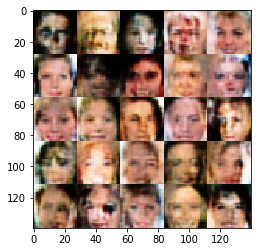

Epoch 1/1... Discriminator Loss: 0.2073... Generator Loss: 2.3773
Epoch 1/1... Discriminator Loss: 0.6941... Generator Loss: 1.2262
Epoch 1/1... Discriminator Loss: 0.4174... Generator Loss: 1.4995
Epoch 1/1... Discriminator Loss: 0.2551... Generator Loss: 1.8370
Epoch 1/1... Discriminator Loss: 0.5844... Generator Loss: 1.1204
Epoch 1/1... Discriminator Loss: 0.0670... Generator Loss: 3.5207
Epoch 1/1... Discriminator Loss: 0.1262... Generator Loss: 4.0386
Epoch 1/1... Discriminator Loss: 0.1024... Generator Loss: 3.4854
Epoch 1/1... Discriminator Loss: 0.0526... Generator Loss: 4.9091
Epoch 1/1... Discriminator Loss: 0.0471... Generator Loss: 4.1416


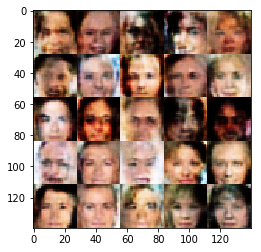

Epoch 1/1... Discriminator Loss: 0.0432... Generator Loss: 6.0870
Epoch 1/1... Discriminator Loss: 0.2433... Generator Loss: 1.8600
Epoch 1/1... Discriminator Loss: 0.0312... Generator Loss: 7.3991
Epoch 1/1... Discriminator Loss: 0.3161... Generator Loss: 1.5137
Epoch 1/1... Discriminator Loss: 0.0812... Generator Loss: 3.6749
Epoch 1/1... Discriminator Loss: 0.1152... Generator Loss: 2.6689
Epoch 1/1... Discriminator Loss: 0.0235... Generator Loss: 4.9462
Epoch 1/1... Discriminator Loss: 0.0275... Generator Loss: 5.0935
Epoch 1/1... Discriminator Loss: 0.0256... Generator Loss: 5.1007
Epoch 1/1... Discriminator Loss: 0.2126... Generator Loss: 1.8875


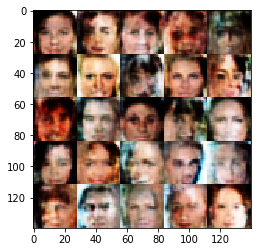

Epoch 1/1... Discriminator Loss: 0.0599... Generator Loss: 3.5682
Epoch 1/1... Discriminator Loss: 0.0471... Generator Loss: 5.6386
Epoch 1/1... Discriminator Loss: 0.6251... Generator Loss: 5.5916
Epoch 1/1... Discriminator Loss: 1.8601... Generator Loss: 0.2767
Epoch 1/1... Discriminator Loss: 2.3226... Generator Loss: 0.1971
Epoch 1/1... Discriminator Loss: 0.3148... Generator Loss: 2.3407
Epoch 1/1... Discriminator Loss: 0.1602... Generator Loss: 3.5824
Epoch 1/1... Discriminator Loss: 0.0801... Generator Loss: 3.8850
Epoch 1/1... Discriminator Loss: 0.1019... Generator Loss: 3.0530
Epoch 1/1... Discriminator Loss: 0.5425... Generator Loss: 1.1847


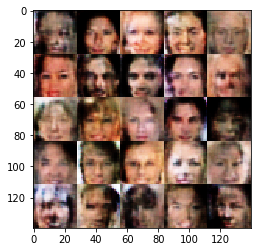

Epoch 1/1... Discriminator Loss: 0.0424... Generator Loss: 4.8999
Epoch 1/1... Discriminator Loss: 0.0940... Generator Loss: 3.6675
Epoch 1/1... Discriminator Loss: 0.5934... Generator Loss: 1.0099
Epoch 1/1... Discriminator Loss: 3.5150... Generator Loss: 0.0750
Epoch 1/1... Discriminator Loss: 0.6685... Generator Loss: 1.2797
Epoch 1/1... Discriminator Loss: 0.3556... Generator Loss: 2.6965
Epoch 1/1... Discriminator Loss: 0.5807... Generator Loss: 1.2243
Epoch 1/1... Discriminator Loss: 0.3279... Generator Loss: 1.7514
Epoch 1/1... Discriminator Loss: 0.0245... Generator Loss: 6.9451
Epoch 1/1... Discriminator Loss: 0.5548... Generator Loss: 1.1032


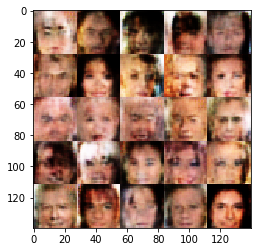

Epoch 1/1... Discriminator Loss: 0.1808... Generator Loss: 2.5961
Epoch 1/1... Discriminator Loss: 0.2345... Generator Loss: 2.2687
Epoch 1/1... Discriminator Loss: 0.0329... Generator Loss: 4.8613
Epoch 1/1... Discriminator Loss: 0.1125... Generator Loss: 3.1121
Epoch 1/1... Discriminator Loss: 0.0621... Generator Loss: 5.2096
Epoch 1/1... Discriminator Loss: 0.0716... Generator Loss: 4.2354
Epoch 1/1... Discriminator Loss: 0.0506... Generator Loss: 6.0687
Epoch 1/1... Discriminator Loss: 0.0468... Generator Loss: 5.3729
Epoch 1/1... Discriminator Loss: 0.2749... Generator Loss: 1.7925
Epoch 1/1... Discriminator Loss: 0.1311... Generator Loss: 2.5885


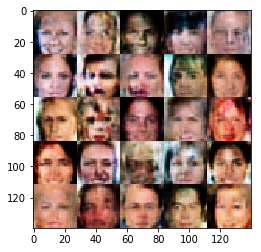

Epoch 1/1... Discriminator Loss: 0.0475... Generator Loss: 3.9754
Epoch 1/1... Discriminator Loss: 0.0578... Generator Loss: 4.3984
Epoch 1/1... Discriminator Loss: 0.0555... Generator Loss: 4.6542
Epoch 1/1... Discriminator Loss: 0.0329... Generator Loss: 5.3579
Epoch 1/1... Discriminator Loss: 0.0323... Generator Loss: 7.4610
Epoch 1/1... Discriminator Loss: 0.1133... Generator Loss: 4.7580
Epoch 1/1... Discriminator Loss: 0.0278... Generator Loss: 7.7629
Epoch 1/1... Discriminator Loss: 0.0367... Generator Loss: 4.1381
Epoch 1/1... Discriminator Loss: 0.0659... Generator Loss: 3.3757
Epoch 1/1... Discriminator Loss: 0.0513... Generator Loss: 4.8508


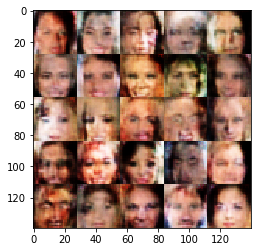

Epoch 1/1... Discriminator Loss: 3.7810... Generator Loss: 0.0338
Epoch 1/1... Discriminator Loss: 0.7048... Generator Loss: 4.2532
Epoch 1/1... Discriminator Loss: 1.0706... Generator Loss: 0.6793
Epoch 1/1... Discriminator Loss: 1.2498... Generator Loss: 0.6293
Epoch 1/1... Discriminator Loss: 0.0478... Generator Loss: 4.9238
Epoch 1/1... Discriminator Loss: 0.3165... Generator Loss: 1.6711
Epoch 1/1... Discriminator Loss: 0.0835... Generator Loss: 4.4845
Epoch 1/1... Discriminator Loss: 0.0450... Generator Loss: 5.6101
Epoch 1/1... Discriminator Loss: 0.3779... Generator Loss: 1.5778
Epoch 1/1... Discriminator Loss: 0.1619... Generator Loss: 2.6848


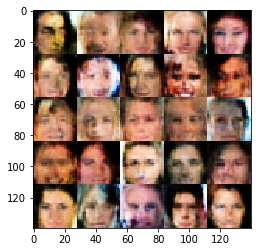

Epoch 1/1... Discriminator Loss: 0.2509... Generator Loss: 1.9482
Epoch 1/1... Discriminator Loss: 0.8019... Generator Loss: 0.8511
Epoch 1/1... Discriminator Loss: 0.0565... Generator Loss: 4.2170
Epoch 1/1... Discriminator Loss: 0.2289... Generator Loss: 5.3219
Epoch 1/1... Discriminator Loss: 0.3042... Generator Loss: 5.3920
Epoch 1/1... Discriminator Loss: 0.2047... Generator Loss: 3.5010
Epoch 1/1... Discriminator Loss: 0.0444... Generator Loss: 3.9446
Epoch 1/1... Discriminator Loss: 0.5396... Generator Loss: 1.0586
Epoch 1/1... Discriminator Loss: 0.0422... Generator Loss: 4.8688
Epoch 1/1... Discriminator Loss: 0.0940... Generator Loss: 3.2900


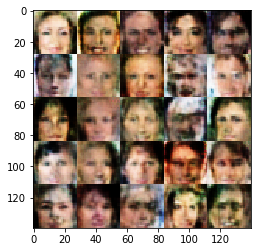

Epoch 1/1... Discriminator Loss: 0.0553... Generator Loss: 4.2984
Epoch 1/1... Discriminator Loss: 0.0240... Generator Loss: 4.7719
Epoch 1/1... Discriminator Loss: 0.0476... Generator Loss: 8.0489
Epoch 1/1... Discriminator Loss: 3.8871... Generator Loss: 6.3705
Epoch 1/1... Discriminator Loss: 1.5390... Generator Loss: 1.2848
Epoch 1/1... Discriminator Loss: 0.9377... Generator Loss: 0.7580
Epoch 1/1... Discriminator Loss: 0.6502... Generator Loss: 1.2374
Epoch 1/1... Discriminator Loss: 0.0607... Generator Loss: 4.6596
Epoch 1/1... Discriminator Loss: 0.2016... Generator Loss: 5.0438
Epoch 1/1... Discriminator Loss: 0.6626... Generator Loss: 4.1249


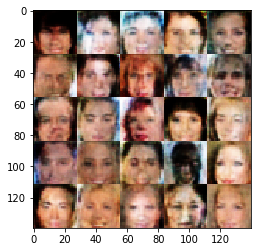

Epoch 1/1... Discriminator Loss: 0.3686... Generator Loss: 2.7127
Epoch 1/1... Discriminator Loss: 0.0252... Generator Loss: 6.0094
Epoch 1/1... Discriminator Loss: 0.1592... Generator Loss: 3.3187
Epoch 1/1... Discriminator Loss: 0.0502... Generator Loss: 6.4263
Epoch 1/1... Discriminator Loss: 0.1567... Generator Loss: 2.9714
Epoch 1/1... Discriminator Loss: 0.4004... Generator Loss: 1.3224
Epoch 1/1... Discriminator Loss: 0.3431... Generator Loss: 1.6345
Epoch 1/1... Discriminator Loss: 0.2498... Generator Loss: 1.9149
Epoch 1/1... Discriminator Loss: 0.2246... Generator Loss: 2.1420
Epoch 1/1... Discriminator Loss: 0.0477... Generator Loss: 3.9997


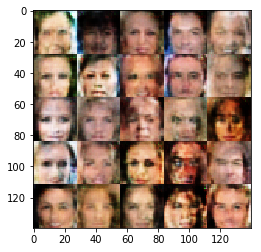

Epoch 1/1... Discriminator Loss: 0.5000... Generator Loss: 1.3793
Epoch 1/1... Discriminator Loss: 0.2314... Generator Loss: 2.7291
Epoch 1/1... Discriminator Loss: 0.2515... Generator Loss: 1.9325
Epoch 1/1... Discriminator Loss: 0.1291... Generator Loss: 4.6001
Epoch 1/1... Discriminator Loss: 0.0452... Generator Loss: 4.1189
Epoch 1/1... Discriminator Loss: 0.0111... Generator Loss: 7.6248
Epoch 1/1... Discriminator Loss: 0.2469... Generator Loss: 2.1622
Epoch 1/1... Discriminator Loss: 0.0406... Generator Loss: 4.8009
Epoch 1/1... Discriminator Loss: 0.0168... Generator Loss: 7.1657
Epoch 1/1... Discriminator Loss: 0.0521... Generator Loss: 4.0238


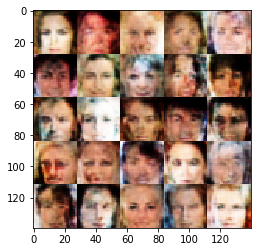

Epoch 1/1... Discriminator Loss: 0.0451... Generator Loss: 3.7641
Epoch 1/1... Discriminator Loss: 0.1001... Generator Loss: 4.3296
Epoch 1/1... Discriminator Loss: 0.1568... Generator Loss: 2.5238
Epoch 1/1... Discriminator Loss: 0.7611... Generator Loss: 0.8109
Epoch 1/1... Discriminator Loss: 0.0432... Generator Loss: 6.6788
Epoch 1/1... Discriminator Loss: 1.7639... Generator Loss: 6.1344
Epoch 1/1... Discriminator Loss: 0.5289... Generator Loss: 1.5467
Epoch 1/1... Discriminator Loss: 0.4805... Generator Loss: 1.4268
Epoch 1/1... Discriminator Loss: 0.3683... Generator Loss: 1.5792
Epoch 1/1... Discriminator Loss: 2.5968... Generator Loss: 0.1598


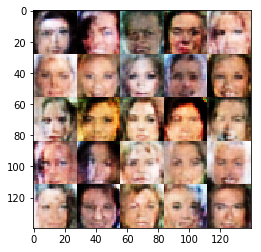

Epoch 1/1... Discriminator Loss: 2.0989... Generator Loss: 0.3006
Epoch 1/1... Discriminator Loss: 0.2845... Generator Loss: 1.7126
Epoch 1/1... Discriminator Loss: 0.6494... Generator Loss: 0.9787
Epoch 1/1... Discriminator Loss: 0.3904... Generator Loss: 1.5504
Epoch 1/1... Discriminator Loss: 0.0795... Generator Loss: 3.3676
Epoch 1/1... Discriminator Loss: 0.2813... Generator Loss: 2.0987
Epoch 1/1... Discriminator Loss: 0.2804... Generator Loss: 1.8255
Epoch 1/1... Discriminator Loss: 0.1414... Generator Loss: 2.6005
Epoch 1/1... Discriminator Loss: 0.1561... Generator Loss: 2.8722
Epoch 1/1... Discriminator Loss: 0.9318... Generator Loss: 0.6123


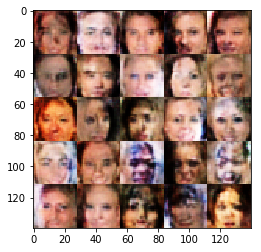

Epoch 1/1... Discriminator Loss: 0.6085... Generator Loss: 1.0771
Epoch 1/1... Discriminator Loss: 0.2404... Generator Loss: 2.0868
Epoch 1/1... Discriminator Loss: 2.3475... Generator Loss: 5.2651
Epoch 1/1... Discriminator Loss: 0.2617... Generator Loss: 1.7231
Epoch 1/1... Discriminator Loss: 0.2380... Generator Loss: 2.1164
Epoch 1/1... Discriminator Loss: 0.1032... Generator Loss: 4.6001
Epoch 1/1... Discriminator Loss: 0.0252... Generator Loss: 6.4553
Epoch 1/1... Discriminator Loss: 0.0798... Generator Loss: 4.0226
Epoch 1/1... Discriminator Loss: 0.1811... Generator Loss: 2.9775
Epoch 1/1... Discriminator Loss: 0.2453... Generator Loss: 1.9177


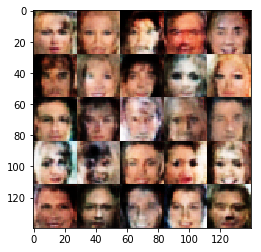

Epoch 1/1... Discriminator Loss: 0.2369... Generator Loss: 1.9562
Epoch 1/1... Discriminator Loss: 0.2943... Generator Loss: 1.6227
Epoch 1/1... Discriminator Loss: 0.9208... Generator Loss: 1.5951
Epoch 1/1... Discriminator Loss: 0.5986... Generator Loss: 2.0325
Epoch 1/1... Discriminator Loss: 0.2454... Generator Loss: 2.5605
Epoch 1/1... Discriminator Loss: 0.4377... Generator Loss: 1.4087
Epoch 1/1... Discriminator Loss: 0.0211... Generator Loss: 6.5390
Epoch 1/1... Discriminator Loss: 0.2489... Generator Loss: 4.9522
Epoch 1/1... Discriminator Loss: 0.1239... Generator Loss: 5.3551
Epoch 1/1... Discriminator Loss: 0.0703... Generator Loss: 3.6877


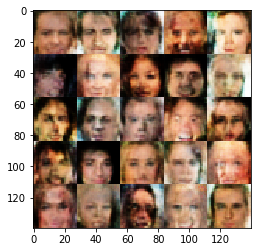

Epoch 1/1... Discriminator Loss: 0.2245... Generator Loss: 2.0996
Epoch 1/1... Discriminator Loss: 0.2366... Generator Loss: 2.1062
Epoch 1/1... Discriminator Loss: 1.2769... Generator Loss: 2.1277
Epoch 1/1... Discriminator Loss: 0.2567... Generator Loss: 2.1126
Epoch 1/1... Discriminator Loss: 1.4233... Generator Loss: 0.4302
Epoch 1/1... Discriminator Loss: 0.1016... Generator Loss: 3.3743
Epoch 1/1... Discriminator Loss: 0.4500... Generator Loss: 1.4535
Epoch 1/1... Discriminator Loss: 1.3034... Generator Loss: 0.4594
Epoch 1/1... Discriminator Loss: 0.0399... Generator Loss: 5.9643
Epoch 1/1... Discriminator Loss: 0.0593... Generator Loss: 3.8401


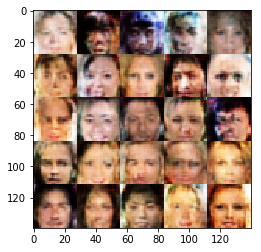

Epoch 1/1... Discriminator Loss: 0.5683... Generator Loss: 1.0832
Epoch 1/1... Discriminator Loss: 0.0263... Generator Loss: 4.8682
Epoch 1/1... Discriminator Loss: 0.0942... Generator Loss: 4.4719
Epoch 1/1... Discriminator Loss: 0.1377... Generator Loss: 2.9244
Epoch 1/1... Discriminator Loss: 0.2018... Generator Loss: 2.1109
Epoch 1/1... Discriminator Loss: 0.2077... Generator Loss: 2.1833
Epoch 1/1... Discriminator Loss: 0.0175... Generator Loss: 6.3274
Epoch 1/1... Discriminator Loss: 0.0748... Generator Loss: 4.2560
Epoch 1/1... Discriminator Loss: 0.0944... Generator Loss: 3.5290
Epoch 1/1... Discriminator Loss: 0.0504... Generator Loss: 3.8344


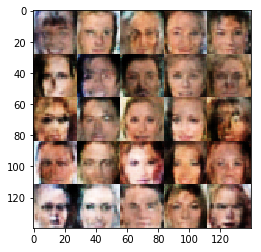

Epoch 1/1... Discriminator Loss: 0.1009... Generator Loss: 3.2914
Epoch 1/1... Discriminator Loss: 0.0496... Generator Loss: 6.8745
Epoch 1/1... Discriminator Loss: 0.0900... Generator Loss: 3.1228
Epoch 1/1... Discriminator Loss: 0.1023... Generator Loss: 3.5417
Epoch 1/1... Discriminator Loss: 3.0982... Generator Loss: 4.1633
Epoch 1/1... Discriminator Loss: 0.3592... Generator Loss: 2.0045
Epoch 1/1... Discriminator Loss: 1.1870... Generator Loss: 3.3299
Epoch 1/1... Discriminator Loss: 0.1498... Generator Loss: 4.9729
Epoch 1/1... Discriminator Loss: 0.1458... Generator Loss: 3.3218
Epoch 1/1... Discriminator Loss: 0.1398... Generator Loss: 2.9570


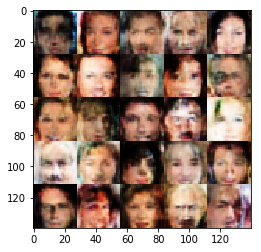

Epoch 1/1... Discriminator Loss: 0.1225... Generator Loss: 2.8885
Epoch 1/1... Discriminator Loss: 0.0143... Generator Loss: 7.4609
Epoch 1/1... Discriminator Loss: 0.1361... Generator Loss: 2.7717
Epoch 1/1... Discriminator Loss: 0.9834... Generator Loss: 0.6554
Epoch 1/1... Discriminator Loss: 0.0373... Generator Loss: 4.5683
Epoch 1/1... Discriminator Loss: 0.2361... Generator Loss: 2.0354
Epoch 1/1... Discriminator Loss: 0.2098... Generator Loss: 2.1406
Epoch 1/1... Discriminator Loss: 0.5516... Generator Loss: 1.0647
Epoch 1/1... Discriminator Loss: 0.8986... Generator Loss: 0.7610
Epoch 1/1... Discriminator Loss: 0.3102... Generator Loss: 1.8080


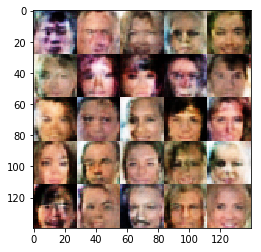

Epoch 1/1... Discriminator Loss: 0.0290... Generator Loss: 6.8372
Epoch 1/1... Discriminator Loss: 0.5334... Generator Loss: 1.0884
Epoch 1/1... Discriminator Loss: 0.0737... Generator Loss: 5.3626
Epoch 1/1... Discriminator Loss: 0.1744... Generator Loss: 2.4348
Epoch 1/1... Discriminator Loss: 0.2959... Generator Loss: 1.6333
Epoch 1/1... Discriminator Loss: 0.0832... Generator Loss: 3.1095
Epoch 1/1... Discriminator Loss: 0.0804... Generator Loss: 3.6503
Epoch 1/1... Discriminator Loss: 0.0946... Generator Loss: 2.8979
Epoch 1/1... Discriminator Loss: 1.8027... Generator Loss: 2.0353
Epoch 1/1... Discriminator Loss: 0.9455... Generator Loss: 0.8690


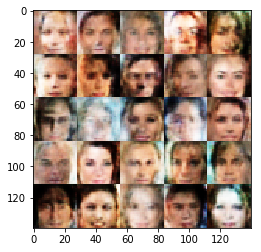

Epoch 1/1... Discriminator Loss: 0.1534... Generator Loss: 5.4848
Epoch 1/1... Discriminator Loss: 0.1861... Generator Loss: 3.0369
Epoch 1/1... Discriminator Loss: 0.2221... Generator Loss: 3.4578
Epoch 1/1... Discriminator Loss: 0.0630... Generator Loss: 3.5906
Epoch 1/1... Discriminator Loss: 0.6974... Generator Loss: 0.8893
Epoch 1/1... Discriminator Loss: 0.3125... Generator Loss: 8.3181
Epoch 1/1... Discriminator Loss: 1.5785... Generator Loss: 0.4061
Epoch 1/1... Discriminator Loss: 0.6987... Generator Loss: 1.0151
Epoch 1/1... Discriminator Loss: 0.6551... Generator Loss: 0.9011
Epoch 1/1... Discriminator Loss: 0.4022... Generator Loss: 2.1340


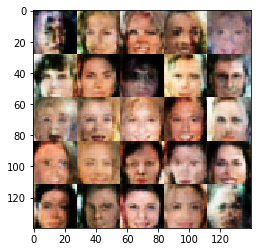

Epoch 1/1... Discriminator Loss: 0.0165... Generator Loss: 7.2670
Epoch 1/1... Discriminator Loss: 0.3153... Generator Loss: 1.7385
Epoch 1/1... Discriminator Loss: 0.1848... Generator Loss: 2.3709
Epoch 1/1... Discriminator Loss: 0.4426... Generator Loss: 1.5498
Epoch 1/1... Discriminator Loss: 0.3419... Generator Loss: 1.7367
Epoch 1/1... Discriminator Loss: 0.2551... Generator Loss: 2.1501
Epoch 1/1... Discriminator Loss: 0.2381... Generator Loss: 1.9148
Epoch 1/1... Discriminator Loss: 0.1225... Generator Loss: 3.0032
Epoch 1/1... Discriminator Loss: 0.1804... Generator Loss: 2.6665
Epoch 1/1... Discriminator Loss: 0.1627... Generator Loss: 2.2931


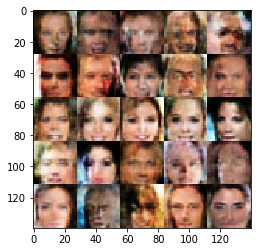

Epoch 1/1... Discriminator Loss: 0.1292... Generator Loss: 2.8141
Epoch 1/1... Discriminator Loss: 0.0989... Generator Loss: 3.2373
Epoch 1/1... Discriminator Loss: 1.9484... Generator Loss: 0.3123
Epoch 1/1... Discriminator Loss: 1.9118... Generator Loss: 4.7109
Epoch 1/1... Discriminator Loss: 0.2836... Generator Loss: 2.3357
Epoch 1/1... Discriminator Loss: 0.3185... Generator Loss: 2.1750
Epoch 1/1... Discriminator Loss: 0.5985... Generator Loss: 1.1976
Epoch 1/1... Discriminator Loss: 0.0567... Generator Loss: 4.2207
Epoch 1/1... Discriminator Loss: 0.0916... Generator Loss: 5.7895
Epoch 1/1... Discriminator Loss: 0.3032... Generator Loss: 1.8074


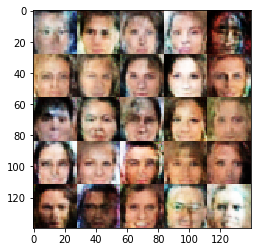

Epoch 1/1... Discriminator Loss: 0.2242... Generator Loss: 2.1644
Epoch 1/1... Discriminator Loss: 0.0932... Generator Loss: 3.3405
Epoch 1/1... Discriminator Loss: 0.2974... Generator Loss: 1.8106
Epoch 1/1... Discriminator Loss: 0.1125... Generator Loss: 3.1826
Epoch 1/1... Discriminator Loss: 0.4037... Generator Loss: 1.4997
Epoch 1/1... Discriminator Loss: 0.0446... Generator Loss: 5.8352
Epoch 1/1... Discriminator Loss: 0.3117... Generator Loss: 1.5668
Epoch 1/1... Discriminator Loss: 0.1637... Generator Loss: 2.6288
Epoch 1/1... Discriminator Loss: 0.0468... Generator Loss: 4.2076
Epoch 1/1... Discriminator Loss: 0.3166... Generator Loss: 1.6136


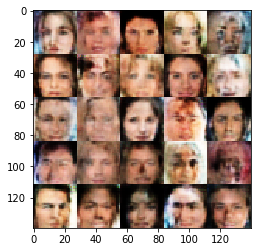

Epoch 1/1... Discriminator Loss: 0.9976... Generator Loss: 0.6013
Epoch 1/1... Discriminator Loss: 0.3815... Generator Loss: 1.4234
Epoch 1/1... Discriminator Loss: 0.0960... Generator Loss: 4.1420
Epoch 1/1... Discriminator Loss: 0.1768... Generator Loss: 2.3567
Epoch 1/1... Discriminator Loss: 0.5624... Generator Loss: 1.1386
Epoch 1/1... Discriminator Loss: 0.0944... Generator Loss: 2.8605
Epoch 1/1... Discriminator Loss: 2.5141... Generator Loss: 0.2553
Epoch 1/1... Discriminator Loss: 0.0927... Generator Loss: 4.6265
Epoch 1/1... Discriminator Loss: 0.7025... Generator Loss: 0.9330
Epoch 1/1... Discriminator Loss: 0.0271... Generator Loss: 4.2714


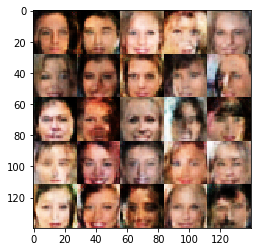

Epoch 1/1... Discriminator Loss: 0.3707... Generator Loss: 2.2200
Epoch 1/1... Discriminator Loss: 0.0995... Generator Loss: 3.2917
Epoch 1/1... Discriminator Loss: 0.0757... Generator Loss: 3.5151
Epoch 1/1... Discriminator Loss: 0.0352... Generator Loss: 5.9305
Epoch 1/1... Discriminator Loss: 0.0809... Generator Loss: 9.8934
Epoch 1/1... Discriminator Loss: 0.1825... Generator Loss: 2.3546
Epoch 1/1... Discriminator Loss: 0.0353... Generator Loss: 4.9933
Epoch 1/1... Discriminator Loss: 0.0368... Generator Loss: 4.0353
Epoch 1/1... Discriminator Loss: 0.0797... Generator Loss: 4.2771
Epoch 1/1... Discriminator Loss: 0.8258... Generator Loss: 0.8052


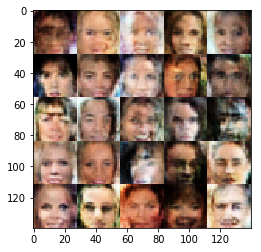

Epoch 1/1... Discriminator Loss: 0.0765... Generator Loss: 3.7182
Epoch 1/1... Discriminator Loss: 0.2815... Generator Loss: 1.7393
Epoch 1/1... Discriminator Loss: 0.1033... Generator Loss: 4.4503
Epoch 1/1... Discriminator Loss: 0.8151... Generator Loss: 3.9480
Epoch 1/1... Discriminator Loss: 0.5033... Generator Loss: 1.5621
Epoch 1/1... Discriminator Loss: 0.4838... Generator Loss: 1.3496
Epoch 1/1... Discriminator Loss: 0.1610... Generator Loss: 2.6258
Epoch 1/1... Discriminator Loss: 0.2201... Generator Loss: 2.4925
Epoch 1/1... Discriminator Loss: 0.1639... Generator Loss: 2.7111
Epoch 1/1... Discriminator Loss: 1.2503... Generator Loss: 0.6538


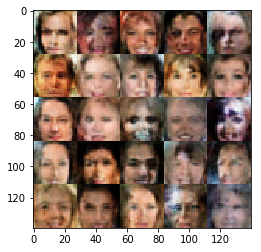

Epoch 1/1... Discriminator Loss: 0.3061... Generator Loss: 1.9905
Epoch 1/1... Discriminator Loss: 0.3937... Generator Loss: 1.7557
Epoch 1/1... Discriminator Loss: 0.2364... Generator Loss: 2.1750
Epoch 1/1... Discriminator Loss: 0.5155... Generator Loss: 1.3862
Epoch 1/1... Discriminator Loss: 0.5867... Generator Loss: 1.0791
Epoch 1/1... Discriminator Loss: 0.0764... Generator Loss: 4.0280
Epoch 1/1... Discriminator Loss: 0.0599... Generator Loss: 3.7579
Epoch 1/1... Discriminator Loss: 0.1406... Generator Loss: 2.6694
Epoch 1/1... Discriminator Loss: 0.0395... Generator Loss: 5.0044
Epoch 1/1... Discriminator Loss: 0.0513... Generator Loss: 3.6920


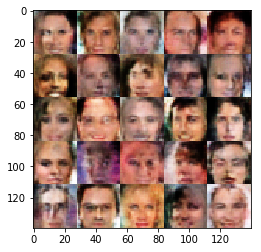

Epoch 1/1... Discriminator Loss: 0.0737... Generator Loss: 3.5277
Epoch 1/1... Discriminator Loss: 0.3728... Generator Loss: 1.4963
Epoch 1/1... Discriminator Loss: 0.0686... Generator Loss: 3.9896
Epoch 1/1... Discriminator Loss: 0.1826... Generator Loss: 2.1921
Epoch 1/1... Discriminator Loss: 0.0375... Generator Loss: 5.0593
Epoch 1/1... Discriminator Loss: 0.4940... Generator Loss: 1.2437
Epoch 1/1... Discriminator Loss: 1.9201... Generator Loss: 0.2862
Epoch 1/1... Discriminator Loss: 0.5374... Generator Loss: 1.7361
Epoch 1/1... Discriminator Loss: 0.6319... Generator Loss: 1.2331
Epoch 1/1... Discriminator Loss: 0.2841... Generator Loss: 2.2973


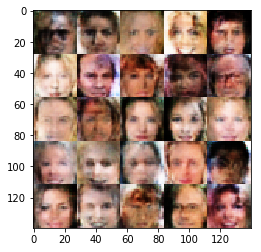

Epoch 1/1... Discriminator Loss: 0.7667... Generator Loss: 0.9939
Epoch 1/1... Discriminator Loss: 1.8503... Generator Loss: 0.3113
Epoch 1/1... Discriminator Loss: 0.2051... Generator Loss: 2.3230
Epoch 1/1... Discriminator Loss: 0.2865... Generator Loss: 2.4822
Epoch 1/1... Discriminator Loss: 0.1815... Generator Loss: 2.6258
Epoch 1/1... Discriminator Loss: 0.0825... Generator Loss: 3.6869
Epoch 1/1... Discriminator Loss: 1.1872... Generator Loss: 0.5357
Epoch 1/1... Discriminator Loss: 0.4607... Generator Loss: 1.3214
Epoch 1/1... Discriminator Loss: 0.2037... Generator Loss: 2.2583
Epoch 1/1... Discriminator Loss: 0.1441... Generator Loss: 2.7571


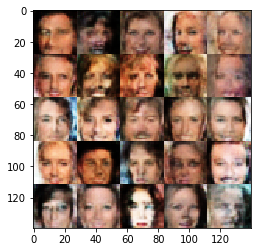

Epoch 1/1... Discriminator Loss: 0.1925... Generator Loss: 3.4013
Epoch 1/1... Discriminator Loss: 1.6712... Generator Loss: 0.4415
Epoch 1/1... Discriminator Loss: 0.1455... Generator Loss: 3.2943
Epoch 1/1... Discriminator Loss: 0.3614... Generator Loss: 1.6121
Epoch 1/1... Discriminator Loss: 0.0525... Generator Loss: 6.7697
Epoch 1/1... Discriminator Loss: 0.2495... Generator Loss: 2.0383
Epoch 1/1... Discriminator Loss: 0.1243... Generator Loss: 2.7879
Epoch 1/1... Discriminator Loss: 0.1636... Generator Loss: 6.2520
Epoch 1/1... Discriminator Loss: 0.1292... Generator Loss: 3.1979
Epoch 1/1... Discriminator Loss: 0.0657... Generator Loss: 3.3796


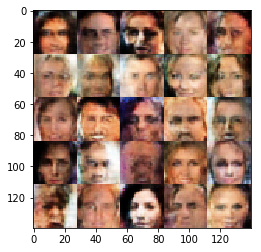

Epoch 1/1... Discriminator Loss: 0.0471... Generator Loss: 5.1283
Epoch 1/1... Discriminator Loss: 0.3340... Generator Loss: 2.1666
Epoch 1/1... Discriminator Loss: 0.3295... Generator Loss: 1.6372
Epoch 1/1... Discriminator Loss: 0.5961... Generator Loss: 1.2074
Epoch 1/1... Discriminator Loss: 0.6057... Generator Loss: 1.0746
Epoch 1/1... Discriminator Loss: 0.2692... Generator Loss: 1.9309
Epoch 1/1... Discriminator Loss: 0.4422... Generator Loss: 1.2897
Epoch 1/1... Discriminator Loss: 0.1045... Generator Loss: 2.7865
Epoch 1/1... Discriminator Loss: 0.0716... Generator Loss: 3.2685
Epoch 1/1... Discriminator Loss: 0.6865... Generator Loss: 1.0978


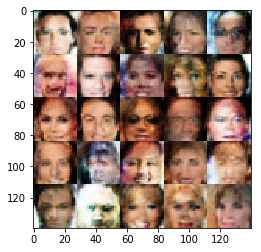

Epoch 1/1... Discriminator Loss: 0.1380... Generator Loss: 5.3458
Epoch 1/1... Discriminator Loss: 0.1361... Generator Loss: 3.5629
Epoch 1/1... Discriminator Loss: 0.0468... Generator Loss: 3.7722
Epoch 1/1... Discriminator Loss: 0.2382... Generator Loss: 2.2238
Epoch 1/1... Discriminator Loss: 0.0491... Generator Loss: 4.7427
Epoch 1/1... Discriminator Loss: 0.0510... Generator Loss: 5.7784
Epoch 1/1... Discriminator Loss: 0.0745... Generator Loss: 3.7370
Epoch 1/1... Discriminator Loss: 0.3782... Generator Loss: 5.0948
Epoch 1/1... Discriminator Loss: 0.4549... Generator Loss: 1.3817
Epoch 1/1... Discriminator Loss: 0.2059... Generator Loss: 2.4905


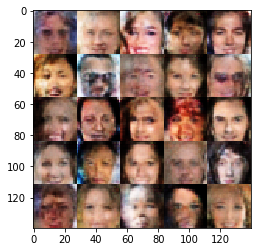

Epoch 1/1... Discriminator Loss: 0.0846... Generator Loss: 3.6727
Epoch 1/1... Discriminator Loss: 0.0318... Generator Loss: 5.2380
Epoch 1/1... Discriminator Loss: 0.0625... Generator Loss: 4.0339
Epoch 1/1... Discriminator Loss: 0.4075... Generator Loss: 2.1951
Epoch 1/1... Discriminator Loss: 0.6514... Generator Loss: 1.1441
Epoch 1/1... Discriminator Loss: 0.0518... Generator Loss: 4.6154
Epoch 1/1... Discriminator Loss: 0.3904... Generator Loss: 1.5516
Epoch 1/1... Discriminator Loss: 0.0741... Generator Loss: 3.3253
Epoch 1/1... Discriminator Loss: 0.3960... Generator Loss: 1.3688
Epoch 1/1... Discriminator Loss: 0.0953... Generator Loss: 3.3066


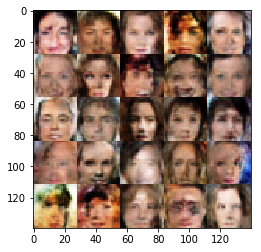

Epoch 1/1... Discriminator Loss: 0.1897... Generator Loss: 3.1097
Epoch 1/1... Discriminator Loss: 0.5185... Generator Loss: 1.3286
Epoch 1/1... Discriminator Loss: 0.1338... Generator Loss: 2.7502
Epoch 1/1... Discriminator Loss: 0.0987... Generator Loss: 3.2572
Epoch 1/1... Discriminator Loss: 0.1965... Generator Loss: 2.2258
Epoch 1/1... Discriminator Loss: 0.0584... Generator Loss: 3.9913
Epoch 1/1... Discriminator Loss: 0.1333... Generator Loss: 2.5016
Epoch 1/1... Discriminator Loss: 0.2772... Generator Loss: 1.9026
Epoch 1/1... Discriminator Loss: 0.5999... Generator Loss: 1.0096
Epoch 1/1... Discriminator Loss: 0.0670... Generator Loss: 4.2027


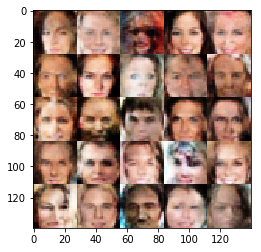

Epoch 1/1... Discriminator Loss: 2.5852... Generator Loss: 0.1252
Epoch 1/1... Discriminator Loss: 0.4558... Generator Loss: 1.4064
Epoch 1/1... Discriminator Loss: 0.0626... Generator Loss: 6.4447
Epoch 1/1... Discriminator Loss: 0.3650... Generator Loss: 1.7475
Epoch 1/1... Discriminator Loss: 0.2794... Generator Loss: 1.8011
Epoch 1/1... Discriminator Loss: 0.0399... Generator Loss: 5.9054
Epoch 1/1... Discriminator Loss: 2.7998... Generator Loss: 0.2123
Epoch 1/1... Discriminator Loss: 0.1458... Generator Loss: 2.8673
Epoch 1/1... Discriminator Loss: 0.4147... Generator Loss: 1.4445
Epoch 1/1... Discriminator Loss: 0.1100... Generator Loss: 6.1052


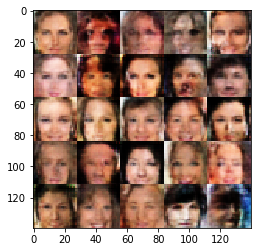

Epoch 1/1... Discriminator Loss: 0.4622... Generator Loss: 1.5663
Epoch 1/1... Discriminator Loss: 2.7372... Generator Loss: 0.1283
Epoch 1/1... Discriminator Loss: 0.8660... Generator Loss: 0.7455
Epoch 1/1... Discriminator Loss: 1.2483... Generator Loss: 0.8488
Epoch 1/1... Discriminator Loss: 0.5154... Generator Loss: 1.2000
Epoch 1/1... Discriminator Loss: 0.5813... Generator Loss: 1.0740
Epoch 1/1... Discriminator Loss: 0.1806... Generator Loss: 2.5958
Epoch 1/1... Discriminator Loss: 0.4517... Generator Loss: 1.3251
Epoch 1/1... Discriminator Loss: 0.0936... Generator Loss: 3.2063
Epoch 1/1... Discriminator Loss: 0.1207... Generator Loss: 3.0667


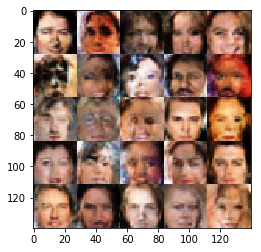

Epoch 1/1... Discriminator Loss: 0.2063... Generator Loss: 2.3167
Epoch 1/1... Discriminator Loss: 0.3278... Generator Loss: 1.7492
Epoch 1/1... Discriminator Loss: 1.1570... Generator Loss: 0.5528
Epoch 1/1... Discriminator Loss: 0.2195... Generator Loss: 2.2810
Epoch 1/1... Discriminator Loss: 0.1118... Generator Loss: 3.1669
Epoch 1/1... Discriminator Loss: 0.2560... Generator Loss: 1.9789
Epoch 1/1... Discriminator Loss: 0.0885... Generator Loss: 3.2294
Epoch 1/1... Discriminator Loss: 0.5844... Generator Loss: 1.0729
Epoch 1/1... Discriminator Loss: 1.2674... Generator Loss: 0.5997
Epoch 1/1... Discriminator Loss: 0.0736... Generator Loss: 3.2940


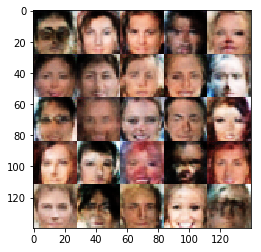

Epoch 1/1... Discriminator Loss: 0.0889... Generator Loss: 3.2728
Epoch 1/1... Discriminator Loss: 0.0929... Generator Loss: 3.0175
Epoch 1/1... Discriminator Loss: 0.2774... Generator Loss: 1.7742
Epoch 1/1... Discriminator Loss: 0.0154... Generator Loss: 6.1365
Epoch 1/1... Discriminator Loss: 0.8201... Generator Loss: 7.0494
Epoch 1/1... Discriminator Loss: 2.0207... Generator Loss: 0.2595
Epoch 1/1... Discriminator Loss: 2.4125... Generator Loss: 0.3341
Epoch 1/1... Discriminator Loss: 1.1697... Generator Loss: 4.9469
Epoch 1/1... Discriminator Loss: 0.3957... Generator Loss: 1.9710
Epoch 1/1... Discriminator Loss: 0.1657... Generator Loss: 4.2898


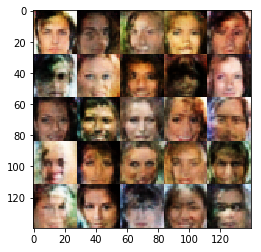

Epoch 1/1... Discriminator Loss: 0.2520... Generator Loss: 2.0231
Epoch 1/1... Discriminator Loss: 0.1401... Generator Loss: 2.9374
Epoch 1/1... Discriminator Loss: 0.0961... Generator Loss: 3.3005
Epoch 1/1... Discriminator Loss: 0.1627... Generator Loss: 2.5503
Epoch 1/1... Discriminator Loss: 0.1126... Generator Loss: 5.0584
Epoch 1/1... Discriminator Loss: 0.6336... Generator Loss: 1.1448
Epoch 1/1... Discriminator Loss: 0.4273... Generator Loss: 1.3494
Epoch 1/1... Discriminator Loss: 0.0602... Generator Loss: 5.7045
Epoch 1/1... Discriminator Loss: 0.7868... Generator Loss: 0.8069
Epoch 1/1... Discriminator Loss: 0.2251... Generator Loss: 2.0578


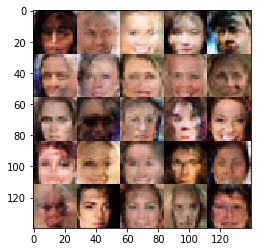

Epoch 1/1... Discriminator Loss: 2.2102... Generator Loss: 0.1898
Epoch 1/1... Discriminator Loss: 0.3977... Generator Loss: 1.4955
Epoch 1/1... Discriminator Loss: 0.8133... Generator Loss: 0.8502


In [14]:
batch_size = 32
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.